In [1]:
# Import all necessary packages.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn import linear_model, preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from sb_utils import save_file

In [2]:
# Import and display the preprocessed housing prices data, as well as the train and test splits.
# Raw original data source: https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features

house_data = pd.read_csv('house_data_preprocessed.csv')
house_data

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,452600.0,83252.0,41.000000,880,129,322,126,37.88,-122.23,5.76,345.81,457.02,41.90,13.20
1,358500.0,83014.0,21.000000,7099,1106,2401,1138,37.86,-122.22,6.35,344.41,455.61,40.42,12.97
2,352100.0,72574.0,26.983847,1467,190,496,177,37.85,-122.24,5.13,344.62,455.79,40.31,11.69
3,341300.0,56431.0,26.983847,1274,235,558,219,37.85,-122.25,4.83,344.98,456.15,40.57,11.20
4,342200.0,38462.0,26.983847,1627,280,565,259,37.85,-122.25,4.83,344.98,456.15,40.57,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,78100.0,15603.0,25.000000,1665,374,845,330,39.48,-121.09,100.68,406.71,516.13,154.42,138.33
19671,77100.0,25568.0,18.000000,697,150,356,114,39.49,-121.21,99.70,409.95,519.62,153.39,135.65
19672,92300.0,17000.0,17.000000,2254,485,1007,433,39.43,-121.22,95.54,406.40,516.17,149.24,131.79
19673,84700.0,18672.0,18.000000,1860,409,741,349,39.43,-121.32,94.45,408.68,518.64,148.01,129.20


In [3]:
X_train = pd.read_csv('house_data_preprocessed_X_train.csv')
y_train = pd.read_csv('house_data_preprocessed_y_train.csv')
X_test = pd.read_csv('house_data_preprocessed_X_test.csv')
y_test = pd.read_csv('house_data_preprocessed_y_test.csv')
X_train

,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,0.347800,0.240000,0.067704,0.080087,0.041061,0.085362,0.189160,0.585657,0.100989,0.035275,0.179909,0.544218,0.579302
1,0.178861,0.640000,0.036396,0.045941,0.023011,0.049342,0.545165,0.335657,0.192332,0.463096,0.543656,0.105429,0.141409
2,0.248446,0.500000,0.026858,0.035698,0.024889,0.039638,0.255048,0.388446,0.057921,0.220646,0.326984,0.353548,0.399886
3,0.193472,0.060000,0.059515,0.092038,0.042462,0.089309,0.069075,0.706175,0.033856,0.129510,0.044348,0.745395,0.765560
4,0.116755,0.540000,0.039676,0.100264,0.055243,0.097862,0.164718,0.603586,0.064046,0.005471,0.154460,0.580246,0.612658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,0.094443,0.200000,0.023323,0.030576,0.001850,0.006743,0.812965,0.325697,0.715457,0.714069,0.753279,0.388152,0.323836
13768,0.186143,0.519677,0.020652,0.033214,0.009081,0.029441,0.639745,0.285857,0.162816,0.568415,0.632985,0.167825,0.133087
13769,0.081991,0.760000,0.043975,0.074965,0.059194,0.078289,0.130712,0.605578,0.003762,0.030516,0.130100,0.614388,0.644144
13770,0.242849,0.080000,0.029198,0.047959,0.018078,0.039967,0.526036,0.241036,0.037039,0.497296,0.572441,0.020247,0.059603


In [4]:
y_train

,Median_House_Value
0,325200.0
1,109100.0
2,120600.0
3,216100.0
4,112500.0
...,...
13767,137500.0
13768,125000.0
13769,141300.0
13770,300000.0


__Objective for this step__: The dependent variable, median house value, is a quantitative variable presumably correlated to some combination of the other provided features. We will therefore perform linear regression to find a model of best fit amongst these features to predict median house value.

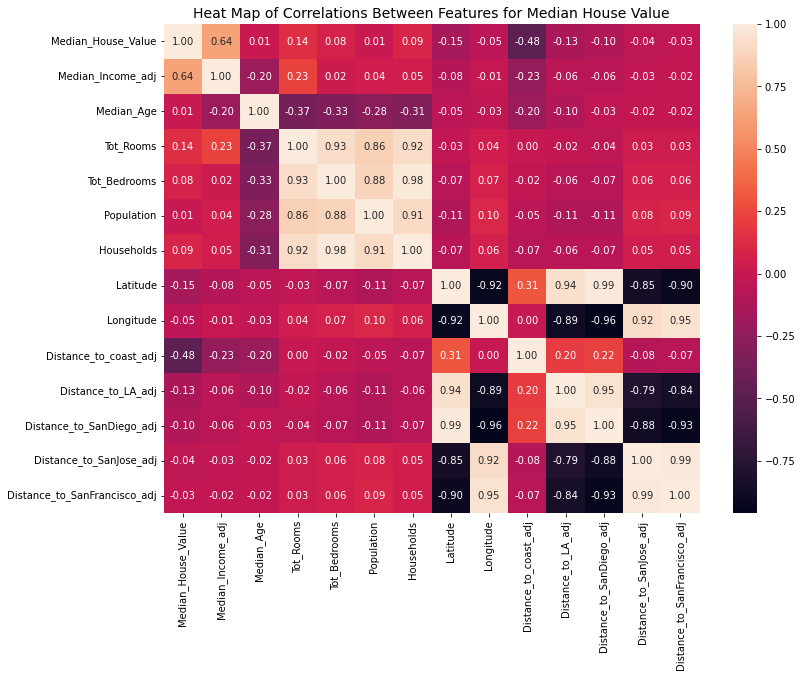

In [5]:
# Remind myself of the correlations between each pair of variables.

f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(round(house_data.corr(), 2), annot = True, fmt = '.2f')
plt.title('Heat Map of Correlations Between Features for Median House Value', fontsize = 14)
plt.show()

In [6]:
# Since we will be using statsmodels' OLS package, add a column of constants to the two sets of independent variables.

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train

,const,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,1.0,0.347800,0.240000,0.067704,0.080087,0.041061,0.085362,0.189160,0.585657,0.100989,0.035275,0.179909,0.544218,0.579302
1,1.0,0.178861,0.640000,0.036396,0.045941,0.023011,0.049342,0.545165,0.335657,0.192332,0.463096,0.543656,0.105429,0.141409
2,1.0,0.248446,0.500000,0.026858,0.035698,0.024889,0.039638,0.255048,0.388446,0.057921,0.220646,0.326984,0.353548,0.399886
3,1.0,0.193472,0.060000,0.059515,0.092038,0.042462,0.089309,0.069075,0.706175,0.033856,0.129510,0.044348,0.745395,0.765560
4,1.0,0.116755,0.540000,0.039676,0.100264,0.055243,0.097862,0.164718,0.603586,0.064046,0.005471,0.154460,0.580246,0.612658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,1.0,0.094443,0.200000,0.023323,0.030576,0.001850,0.006743,0.812965,0.325697,0.715457,0.714069,0.753279,0.388152,0.323836
13768,1.0,0.186143,0.519677,0.020652,0.033214,0.009081,0.029441,0.639745,0.285857,0.162816,0.568415,0.632985,0.167825,0.133087
13769,1.0,0.081991,0.760000,0.043975,0.074965,0.059194,0.078289,0.130712,0.605578,0.003762,0.030516,0.130100,0.614388,0.644144
13770,1.0,0.242849,0.080000,0.029198,0.047959,0.018078,0.039967,0.526036,0.241036,0.037039,0.497296,0.572441,0.020247,0.059603


In [7]:
# Define general function to easily plot predictions.

def plot_results(y_test, y_pred, plot_title):
    plt.figure(figsize = (8, 8))
    plt.scatter(y_test, y_pred)
    plt.plot([x for x in range(0, 500000)], [y for y in range(0, 500000)], color = 'red')
    plt.axhline(y = 0, color = 'green', ls = '--')
    plt.title(plot_title)
    plt.xlabel('Actual median house values')
    plt.ylabel('Predicted median house values')
    plt.show()

In [8]:
# Define function to calculate RMSE between predicted and actual median house values.
# (For future reference: Next time we can simply import and call the following:
#     from sklearn.metrics import mean_squared_error
#     mean_squared_error(y_test, y_pred, squared = False))

def rmse(y_pred, y_test):
    comparisons = y_test.copy()
    comparisons.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
    comparisons['pred'] = y_pred
    return "Average difference between predicted and actual median house values: " + str(np.sqrt(((comparisons['pred'] - comparisons['actual']) ** 2).mean()))

__1st model__: Create a linear regression model using all features, to have a baseline.

In [9]:
# Build the model.

LRmodel_all = sm.OLS(y_train, X_train)

LRmodel_all_results = LRmodel_all.fit()

LRmodel_all_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1651.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:22:39   Log-Likelihood:            -1.7122e+05
No. Observations:               13772   AIC:                         3.425e+05
Df Residuals:                   13758   BIC:                         3.426e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2.587e+05   1.26e+04     20.497      0.000    2.34e+05    2.83e+05
Median_Income_adj             4.787e+05   5725.040     83.611      0.000    4.67e+05     4.9e+05
Median_Age                    1.959e+04   2730.902      7.174      0.000    1.42e+04    2.49e+04
Tot_Rooms                    -2.683e+05   3.43e+04     -7.820      0.000   -3.36e+05   -2.01e+05
Tot_Bedrooms                  5.557e+05   4.72e+04     11.776      0.000    4.63e+05    6.48e+05
Population                   -1.297e+06    4.4e+04    -29.450      0.000   -1.38e+06   -1.21e+06
Households                    3.366e+05   4.81e+04      7.006      0.000    2.42e+05    4.31e+05
Latitude                     -3.958e+05   2.81e+04    -14.082      0.000   -4.51e+05   -3.41e+05
Longitude                    -2.425e+05   1.79e+04    -13.563      0.000   -2.78e+05   -2.07e+05
Distance_to_coast_adj        -7.831e+04   7031.452    -11.137      0.000   -9.21e+04   -6.45e+04
Distance_to_LA_adj           -1.555e+05   8356.053    -18.610      0.000   -1.72e+05   -1.39e+05
Distance_to_SanDiego_adj      2.934e+05   3.57e+04      8.224      0.000    2.23e+05    3.63e+05
Distance_to_SanJose_adj       1.567e+05   2.07e+04      7.589      0.000    1.16e+05    1.97e+05
Distance_to_SanFrancisco_adj -1.536e+05   2.38e+04     -6.444      0.000      -2e+05   -1.07e+05
==============================================================================
Omnibus:                     2670.782   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6649.046
Skew:                           1.073   Prob(JB):                         0.00
Kurtosis:                       5.642   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Use the model to predict median house value among the test set.

y_pred_all = LRmodel_all_results.predict(X_test)

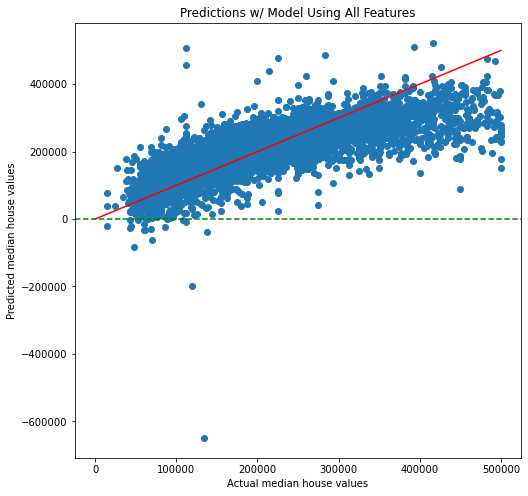

In [11]:
# Plot predictions for model that uses all features.

plot_results(y_test, y_pred_all, 'Predictions w/ Model Using All Features')

In [12]:
# Calculate the RMSE of this model.

rmse(y_pred_all, y_test)

'Average difference between predicted and actual median house values: 62431.91679260641'

__Takeaways of 1st model__:

 - From eyeballing the plot:
    - The predicted median house values have a large spread in either direction compared to what they actually are, appearing to be up to several hundred thousand off.
    - There are many negative predictions, including a couple that are approximately -200,000 and -650,000, obviously none of which can be accurate. Since this is purely a baseline model, we won't delve into what is driving the negative predictions.
    - The model appears to underpredict more and more as the actual value increases, entirely underpredicting after actual values increase to ~425,000.
 - The summary statistics give an R-squared value of 0.609. This correlation could be considered middle of the road, boosted by the fact that we are considering all of the features that actually matter, but also all of the features that don't.
 - The summary statistics give an F-statistic of 1,651 and a p-value of ~0. This indicates that the model is much stronger than one that is purely random.
 - The RMSE is 62,432, indicating that on average the actual value is 62,432 away from the predicted. Considering that the actual median house values range from 14,999 to 500,000, this is not very good.

__2nd model__: Create a linear regression model using the two features that may have some distinct correlation with the dependent variable, median income and distance to coast.

In [13]:
# Declare features to use in both training and test sets.

X_train_discorr = X_train[['Median_Income_adj', 'Distance_to_coast_adj']]
X_test_discorr = X_test[['Median_Income_adj', 'Distance_to_coast_adj']]
X_train_discorr

,Median_Income_adj,Distance_to_coast_adj
0,0.347800,0.100989
1,0.178861,0.192332
2,0.248446,0.057921
3,0.193472,0.033856
4,0.116755,0.064046
...,...,...
13767,0.094443,0.715457
13768,0.186143,0.162816
13769,0.081991,0.003762
13770,0.242849,0.037039


In [81]:
# Build the model.

LRmodel_discorr = sm.OLS(y_train, X_train_discorr)

LRmodel_discorr_results = LRmodel_discorr.fit()

LRmodel_discorr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Median_House_Value   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                          4.491e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:25:21   Log-Likelihood:                     -1.7476e+05
No. Observations:               13772   AIC:                                  3.495e+05
Df Residuals:                   13770   BIC:                                  3.495e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Median_Income_adj      7.467e+05   2766.758    269.873      0.000    7.41e+05    7.52e+05
Distance_to_coast_adj -8.342e+04   3923.992    -21.260      0.000   -9.11e+04   -7.57e+04
==============================================================================
Omnibus:                     1659.713   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3635.723
Skew:                           0.736   Prob(JB):                         0.00
Kurtosis:                       5.042   Cond. No.                         1.93
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# TESTING - DELETE LATER

LRmodel_discorr.score(X_train_discorr, y_train)

ValueError: shapes (2,2) and (13772,2) not aligned: 2 (dim 1) != 13772 (dim 0)

In [15]:
# Use the model to predict median house value among the test set.

y_pred_discorr = LRmodel_discorr_results.predict(X_test_discorr)

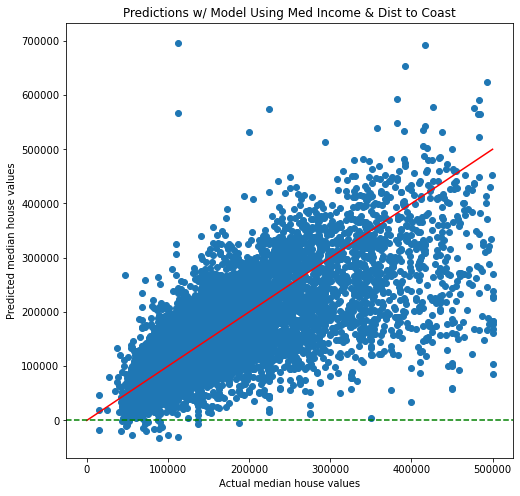

In [16]:
# Plot predictions for model that uses the two features with potentially distinct correlation.

plot_results(y_test, y_pred_discorr, 'Predictions w/ Model Using Med Income & Dist to Coast')

In [17]:
# Take a deeper look at the negative predictions.

comparisons_discorr = y_test.copy()
comparisons_discorr.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
temp_col_names = []
for col in X_test_discorr.columns:
    comparisons_discorr[col] = X_test_discorr[col]
    temp_col_names.append(col)
comparisons_discorr['pred'] = y_pred_discorr
comparisons_discorr['diff'] = comparisons_discorr['actual'] - comparisons_discorr['pred']
temp_col_names.extend(['actual', 'pred', 'diff'])
comparisons_discorr = comparisons_discorr[temp_col_names]
comparisons_discorr

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
0,0.105615,0.070364,104200.0,72990.031820,31209.968180
1,0.293411,0.034193,171200.0,216229.481600,-45029.481600
2,0.280539,0.243019,97300.0,189197.383221,-91897.383221
3,0.240208,0.030625,102700.0,176801.987049,-74101.987049
4,0.134419,0.189486,116500.0,84559.141101,31940.858899
...,...,...,...,...,...
5898,0.077326,0.356258,66000.0,28016.645797,37983.354203
5899,0.159498,0.018568,330800.0,117544.029037,213255.970963
5900,0.290572,0.122209,144400.0,206767.499085,-62367.499085
5901,0.266853,0.058355,200000.0,194383.647093,5616.352907


In [18]:
comparisons_discorr[comparisons_discorr['pred'] < 0].sort_values(by = 'actual')

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
3717,0.002854,0.235399,14999.0,-17506.728699,32505.728699
1247,0.025720,0.465107,42500.0,-19596.730295,62096.730295
3747,0.058073,0.522546,43300.0,-231.059541,43531.059541
2862,0.043344,0.516422,48500.0,-10718.473725,59218.473725
4447,0.056152,0.531372,49100.0,-2401.901862,51501.901862
5371,0.028780,0.363009,49400.0,-8794.632113,58194.632113
744,0.052246,0.475283,51700.0,-639.128244,52339.128244
850,0.022146,0.530842,55500.0,-27748.963088,83248.963088
2096,0.036109,0.499301,69000.0,-14691.968044,83691.968044
5322,0.047147,0.496841,72300.0,-6245.373404,78545.373404


In [19]:
# Take a deeper look at the more extreme differences.

comparisons_discorr[comparisons_discorr['diff'] < -200000].sort_values(by = 'diff', ascending = False)

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
5789,0.536931,0.523607,155600.0,357231.036747,-201631.036747
301,0.532678,0.287388,171900.0,373761.227728,-201861.227728
366,0.566367,0.182879,204800.0,407634.980196,-202834.980196
2666,0.612012,0.185387,235200.0,441507.161216,-206307.161216
3519,0.819392,0.232698,381800.0,592405.388768,-210605.388768
902,0.438234,0.012009,110000.0,326216.179703,-216216.179703
746,0.544300,0.196865,172200.0,389991.306572,-217791.306572
1542,0.614637,0.540005,193500.0,413883.531953,-220383.531953
247,0.696769,0.075428,293500.0,513966.804944,-220466.804944
3280,0.382478,0.208102,47500.0,268225.199469,-220725.199469


In [20]:
len(comparisons_discorr[comparisons_discorr['diff'] > 200000])

147

In [21]:
comparisons_discorr[comparisons_discorr['diff'] > 300000].sort_values(by = 'diff')

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
3537,0.150026,0.059609,410700.0,107047.672135,303652.327865
4362,0.129224,0.006897,400000.0,95912.851361,304087.148639
4235,0.254273,0.005787,494400.0,189376.484428,305023.515572
3903,0.241157,0.126549,476700.0,169507.993856,307192.006144
5130,0.203553,0.021413,457700.0,150201.426145,307498.573855
5727,0.206139,0.001061,464300.0,153829.747856,310470.252144
3536,0.175959,0.009694,444400.0,130575.587035,313824.412965
2767,0.247086,0.009887,500000.0,183668.141995,316331.858005
822,0.223493,0.001592,483300.0,166743.859620,316556.140380
2382,0.246067,0.008922,500000.0,182987.046364,317012.953636


In [22]:
# Calculate the RMSE of this model.

rmse(y_pred_discorr, y_test)

'Average difference between predicted and actual median house values: 79468.35564100769'

__Takeaways of 2nd model__:

 - From eyeballing the plot: 
    - The predicted median house values, when the actual value is ~200,000 or less, have much less spread in either direction compared to the baseline, appearing to be generally 50,000-100,000 off. However, as the actual value increases past 200,000, the spread greatly increases to once again being several hundreds of thousands off.
    - There are much fewer negative predictions, only 22, all of which are not extremely negative, and all for actual values of less than 200,000. The model seems to do a good job of not extremely underpredicting. However...
    - The model still appears to underpredict more and more as the actual value increases, and while not entirely unpredicting at any point, to underpredict with more and more difference.
    - There are four actual values that were overpredicted by more than 300,000, with the largest overprediction having a difference of 583,995. Because there are many fewer overpredictions compared to underpredictions, it may make more to sense to focus on the latter for now.
    - Visually, like the previous model, predicted values tend to curve downward as actual values increase. Perhaps taking the log of a feature could straighten it out.
 - The summary statistics give an R-squared value of 0.867. This correlation is much better than that of the previous model and quite good on its own.
 - The summary statistics give an F-statistic of 4,491 and a p-value of ~0. This indicates that the model is much stronger than one that is purely random.
 - The RMSE is 79,468, indicating that on average the actual value is 79,468 away from the predicted. Despite having a much higher R-squared value than the previous model, this model actually has a worse RMSE. This is likely driven by the differences in the higher actual values, as visualized by the plot, which shows them fanning out more as the actual value increases.

__3rd model__: Create a linear regression model using the two features that may have some distinct correlation with the dependent variable, median income and distance to coast, and also taking the log of the latter feature.

In [23]:
# Declare features to use in both training and test sets.

X_train_discorr_logDtc = pd.DataFrame()
X_train_discorr_logDtc['Median_Income_adj'] = X_train['Median_Income_adj']
X_train_discorr_logDtc['Distance_to_coast_adj'] = X_train['Distance_to_coast_adj']
X_train_discorr_logDtc['Median_House_Value'] = y_train['Median_House_Value']                                     # Doing this so that the next line evens the lengths of the X and y sets.
X_train_discorr_logDtc = X_train_discorr_logDtc[X_train_discorr_logDtc['Distance_to_coast_adj'] > 0]             # Doing this so that taking the log of 'Distance_to_coast_adj' doesn't result in -inf values.
X_train_discorr_logDtc['Distance_to_coast_adj_log'] = np.log10(X_train_discorr_logDtc['Distance_to_coast_adj'])

X_test_discorr_logDtc = pd.DataFrame()
X_test_discorr_logDtc['Median_Income_adj'] = X_test['Median_Income_adj']
X_test_discorr_logDtc['Distance_to_coast_adj'] = X_test['Distance_to_coast_adj']
X_test_discorr_logDtc['Median_House_Value'] = y_test['Median_House_Value']                                       # Doing this so that the next line evens the lengths of the X and y sets.
X_test_discorr_logDtc = X_test_discorr_logDtc[X_test_discorr_logDtc['Distance_to_coast_adj'] > 0]                # Doing this so that taking the log of 'Distance_to_coast_adj' doesn't result in -inf values.
X_test_discorr_logDtc['Distance_to_coast_adj_log'] = np.log10(X_test_discorr_logDtc['Distance_to_coast_adj'])

y_train_logDtc = pd.DataFrame(X_train_discorr_logDtc['Median_House_Value'])
y_test_logDtc = pd.DataFrame(X_test_discorr_logDtc['Median_House_Value'])
X_train_discorr_logDtc = X_train_discorr_logDtc.drop(columns = ['Distance_to_coast_adj', 'Median_House_Value'])
X_test_discorr_logDtc = X_test_discorr_logDtc.drop(columns = ['Distance_to_coast_adj', 'Median_House_Value'])

In [24]:
# Build the model.

LRmodel_discorr_logDtc = sm.OLS(y_train_logDtc, X_train_discorr_logDtc)

LRmodel_discorr_logDtc_results = LRmodel_discorr_logDtc.fit()

LRmodel_discorr_logDtc_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Median_House_Value   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                          7.035e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                        0.00
Time:                        11:22:42   Log-Likelihood:                     -1.7198e+05
No. Observations:               13770   AIC:                                  3.440e+05
Df Residuals:                   13768   BIC:                                  3.440e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Median_Income_adj          4.414e+05   3755.920    117.510      0.000    4.34e+05    4.49e+05
Distance_to_coast_adj_log -6.997e+04    811.463    -86.231      0.000   -7.16e+04   -6.84e+04
==============================================================================
Omnibus:                     2284.007   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4945.562
Skew:                           0.978   Prob(JB):                         0.00
Kurtosis:                       5.189   Cond. No.                         9.15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Use the model to predict median house value among the test set.

y_pred_discorr_logDtc = LRmodel_discorr_logDtc_results.predict(X_test_discorr_logDtc)

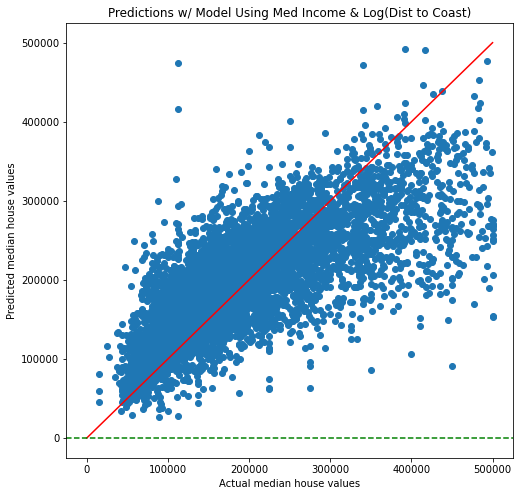

In [26]:
# Plot predictions for model that uses the two features with potentially distinct correlation, with one of them logged.

plot_results(y_test_logDtc, y_pred_discorr_logDtc, 'Predictions w/ Model Using Med Income & Log(Dist to Coast)')

In [27]:
# Take a deeper look at all of the actual vs. predicted values.

comparisons_discorr_logDtc = y_test_logDtc.copy()
comparisons_discorr_logDtc.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
temp_col_names = []
for col in X_test_discorr_logDtc.columns:
    comparisons_discorr_logDtc[col] = X_test_discorr_logDtc[col]
    temp_col_names.append(col)
comparisons_discorr_logDtc['pred'] = y_pred_discorr_logDtc
comparisons_discorr_logDtc['diff'] = comparisons_discorr_logDtc['actual'] - comparisons_discorr_logDtc['pred']
temp_col_names.extend(['actual', 'pred', 'diff'])
comparisons_discorr_logDtc = comparisons_discorr_logDtc[temp_col_names]
comparisons_discorr_logDtc.sort_values(by = 'Median_Income_adj', ascending = False).head(20)

,Median_Income_adj,Distance_to_coast_adj_log,actual,pred,diff
4121,0.951802,-0.769299,112500.0,473917.379990,-361417.379990
4313,0.935285,-1.119423,416700.0,491126.963130,-74426.963130
3362,0.877765,-1.493230,392600.0,491896.462045,-99296.462045
3485,0.839055,-1.518053,493000.0,476548.287071,16451.712929
3519,0.819392,-0.633207,381800.0,405953.975413,-24153.975413
391,0.794699,-1.459372,483100.0,452865.375622,30234.624378
5455,0.780484,-1.294276,426100.0,435038.743014,-8938.743014
4770,0.777645,-1.275311,477600.0,432458.975163,45141.024837
2528,0.774435,-0.460096,382400.0,373998.886207,8401.113793
5822,0.769027,-1.097120,112500.0,416186.623223,-303686.623223


In [28]:
# Calculate the RMSE of this model.

rmse(y_pred_discorr_logDtc, y_test_logDtc)

'Average difference between predicted and actual median house values: 65901.45938214028'

__Takeaways of 3rd model__:

 - From eyeballing the plot: 
    - The spread of predicted median house values as the actual values increase has decreased compared to the previous model.
    - There are no negative predictions. 
    - The model still appears to underpredict more and more as the actual value increases, and with more and more difference, although it is underpredicting less than does the previous model.
    - Visually, like the previous model, predicted values tend to curve downward as actual values increase.
 - The summary statistics give an R-squared value of 0.911. This correlation is even better than that of the previous model, which was already pretty good.
 - The RMSE is 65,901, indicating that on average the actual value is 65,901 away from the predicted. This is better than the previous model's RMSE, although slightly worse than the first model's, while also having the best R-squared value. It's getting hard to tell now whether an RMSE in this range is actually good or bad, since it hasn't varied much across the different models.

__4th model__: Create a linear regression model using the best X features as determined via SelectKBest.

In [29]:
# Determine the optimal number of features to use in the model.

select_num_rsq_array = []
select_num_rmse_array = []

for i in range(2, 14):
    select_num = i
    select = SelectKBest(k = select_num)
    X_train_select = select.fit_transform(X_train, np.ravel(y_train))
    selected = select.get_support()
    cols_selected = X_train.columns[selected]

    X_train_selectKbest = X_train[cols_selected]
    X_test_selectKbest = X_test[cols_selected]

    LRmodel_selectKbest = sm.OLS(y_train, X_train_selectKbest)
    LRmodel_selectKbest_results = LRmodel_selectKbest.fit()
    select_num_rsq_array.append(LRmodel_selectKbest_results.rsquared)

    y_pred_selectKbest = LRmodel_selectKbest_results.predict(X_test_selectKbest)
    comparisons_selectKbest = y_test.copy()
    comparisons_selectKbest.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
    comparisons_selectKbest['pred'] = y_pred_selectKbest
    select_num_rmse_array.append(np.sqrt(((comparisons_selectKbest['pred'] - comparisons_selectKbest['actual']) ** 2).mean()))

c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\

In [30]:
select_num_rmse_array

[79468.35564100769,
 78451.12753391324,
 77680.24491240186,
 77479.8960963347,
 74343.46844327076,
 69382.72927612843,
 68091.51586624995,
 67133.72538387586,
 64397.05229310711,
 64306.40631750541,
 63893.54703137605,
 63560.84681537761]

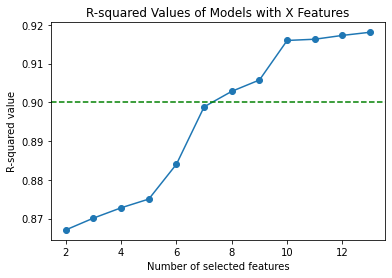

In [31]:
plt.plot(range(2, 14), select_num_rsq_array, marker = 'o')
plt.axhline(y = .90, color = 'green', ls = '--')
plt.xlabel('Number of selected features')
plt.ylabel('R-squared value')
plt.title('R-squared Values of Models with X Features')
plt.show()

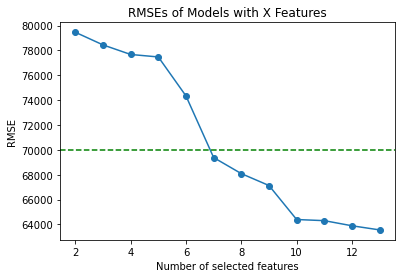

In [32]:
plt.plot(range(2, 14), select_num_rmse_array, marker = 'o')
plt.axhline(y = 70000, color = 'green', ls = '--')
plt.xlabel('Number of selected features')
plt.ylabel('RMSE')
plt.title('RMSEs of Models with X Features')
plt.show()

In [33]:
# Because no more significant increases in R^2 or dropoffs in error occur when using more than 10 features, we will use 10 features in the model.
# Determine features to use in model.

select_num = 10
select = SelectKBest(k = select_num)
X_train_select = select.fit_transform(X_train, y_train)
selected = select.get_support()
cols_selected = X_train.columns[selected]
cols_selected

c:\Users\Dan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['Median_Income_adj', 'Tot_Rooms', 'Tot_Bedrooms', 'Population',
       'Households', 'Latitude', 'Distance_to_coast_adj', 'Distance_to_LA_adj',
       'Distance_to_SanDiego_adj', 'Distance_to_SanJose_adj'],
      dtype='object')

In [34]:
X_train_selectKbest = X_train[cols_selected]
X_test_selectKbest = X_test[cols_selected]
X_train_selectKbest

,Median_Income_adj,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj
0,0.347800,0.067704,0.080087,0.041061,0.085362,0.189160,0.100989,0.035275,0.179909,0.544218
1,0.178861,0.036396,0.045941,0.023011,0.049342,0.545165,0.192332,0.463096,0.543656,0.105429
2,0.248446,0.026858,0.035698,0.024889,0.039638,0.255048,0.057921,0.220646,0.326984,0.353548
3,0.193472,0.059515,0.092038,0.042462,0.089309,0.069075,0.033856,0.129510,0.044348,0.745395
4,0.116755,0.039676,0.100264,0.055243,0.097862,0.164718,0.064046,0.005471,0.154460,0.580246
...,...,...,...,...,...,...,...,...,...,...
13767,0.094443,0.023323,0.030576,0.001850,0.006743,0.812965,0.715457,0.714069,0.753279,0.388152
13768,0.186143,0.020652,0.033214,0.009081,0.029441,0.639745,0.162816,0.568415,0.632985,0.167825
13769,0.081991,0.043975,0.074965,0.059194,0.078289,0.130712,0.003762,0.030516,0.130100,0.614388
13770,0.242849,0.029198,0.047959,0.018078,0.039967,0.526036,0.037039,0.497296,0.572441,0.020247


In [35]:
# Build the model.

LRmodel_selectKbest = sm.OLS(y_train, X_train_selectKbest)

LRmodel_selectKbest_results = LRmodel_selectKbest.fit()

LRmodel_selectKbest_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Median_House_Value   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                          1.500e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                        0.00
Time:                        11:22:49   Log-Likelihood:                     -1.7160e+05
No. Observations:               13772   AIC:                                  3.432e+05
Df Residuals:                   13762   BIC:                                  3.433e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Median_Income_adj         5.235e+05   5127.214    102.095      0.000    5.13e+05    5.34e+05
Tot_Rooms                -4.534e+05   3.42e+04    -13.265      0.000    -5.2e+05   -3.86e+05
Tot_Bedrooms              5.466e+05   4.78e+04     11.426      0.000    4.53e+05     6.4e+05
Population               -1.244e+06   4.48e+04    -27.740      0.000   -1.33e+06   -1.16e+06
Households                4.831e+05   4.89e+04      9.881      0.000    3.87e+05    5.79e+05
Latitude                 -6.325e+05   2.66e+04    -23.741      0.000   -6.85e+05    -5.8e+05
Distance_to_coast_adj    -1.343e+05   5332.573    -25.184      0.000   -1.45e+05   -1.24e+05
Distance_to_LA_adj       -2.518e+05   7310.539    -34.439      0.000   -2.66e+05   -2.37e+05
Distance_to_SanDiego_adj  9.209e+05   2.65e+04     34.781      0.000    8.69e+05    9.73e+05
Distance_to_SanJose_adj    9.78e+04   2393.308     40.865      0.000    9.31e+04    1.02e+05
==============================================================================
Omnibus:                     2353.367   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5901.966
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                       5.581   Cond. No.                         104.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Use the model to predict median house value among the test set.

y_pred_selectKbest = LRmodel_selectKbest_results.predict(X_test_selectKbest)

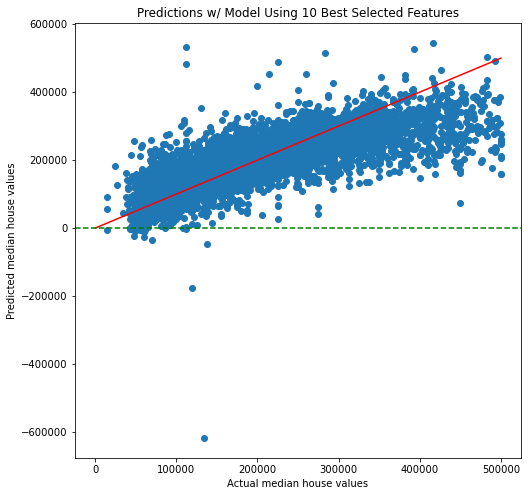

In [37]:
# Plot predictions for model that uses the 10 best selected features.

plot_results(y_test, y_pred_selectKbest, 'Predictions w/ Model Using ' + str(select_num) + ' Best Selected Features')

In [38]:
# Calculate the RMSE of this model.

rmse(y_pred_selectKbest, y_test)

'Average difference between predicted and actual median house values: 64397.05229310711'

__Takeaways of 4th model__:

 - From eyeballing the plot: 
    - The spread of predicted median house values as the actual values increase has decreased compared to the previous model.
    - There are a few negative predictions. Most of them are low in magnitude, but one is approximately -200,000 and another approximately -600,000. 
    - The model still appears to underpredict more and more as the actual value increases, and with more and more difference, although it is underpredicting less than does the previous model.
    - Visually, like the previous model, predicted values tend to curve downward as actual values increase, although much less than the previous model.
 - The summary statistics give an R-squared value of 0.916, and the RMSE is 64,397. These are both slightly better than those of the previous model, although this model uses nearly every available feature and may be overfitting.
 - Among the 10 best selected features is latitude. This seems suspicious to use in the model as a quantitative value, since it essentially describes an address and is therefore basically categorical (unless something like climate is being accounted for). Also included are the distances to both LA and San Diego, which we know are highly correlated with each other. Is it better practice to include all selected features since they technically create the model with the best numbers, or to exclude certain features if they don't make conceptual sense within the model?

__5th model__: Create a KNN algorithm with X neighbors as determined via GridSearchCV, and using the two features that may have some distinct correlation with the dependent variable.

In [43]:
# (Cross-checking GridSearchCV: Determine the optimal number of neighbors to use in the algorithm by brute-force checking every number via for-loop.)

train_accuracies = []
test_accuracies = []
neighbors = np.arange(1, 502, 10)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, np.ravel(y_train))
    train_accuracies.append(knn.score(X_train, np.ravel(y_train)))
    test_accuracies.append(knn.score(X_test, np.ravel(y_test)))

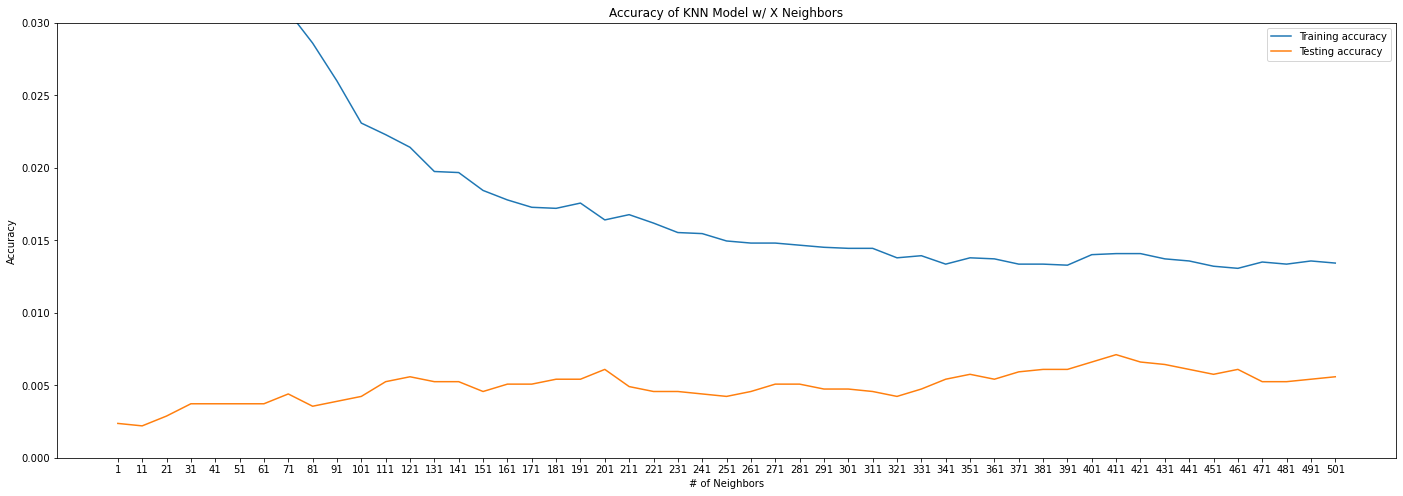

In [74]:
plt.figure(figsize = (24, 8))
plt.plot(neighbors, train_accuracies, label = 'Training accuracy')
plt.plot(neighbors, test_accuracies, label = 'Testing accuracy')
plt.title('Accuracy of KNN Model w/ X Neighbors')
plt.ylim(top = .03, bottom = 0)
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(neighbors)
plt.show()

In [76]:
print('Best # of neighbors: ' + str(list(neighbors)[test_accuracies.index(max(test_accuracies))])
+ ' with a training accuracy of ' + str(round(train_accuracies[test_accuracies.index(max(test_accuracies))], 4))
+ ' and a testing accuracy of ' + str(round(max(test_accuracies), 4)))

Best # of neighbors: 411 with a training accuracy of 0.0141 and a testing accuracy of 0.0071


In [40]:
# Determine the optimal number of neighbors to use in the algorithm, first by determining the approximate neighborhood of the optimal number of neighbors, then by searching around that neighborhood.

param_grid_neighborhood = {'n_neighbors': np.arange(1, 502, 10)}
knn_neighborhood = KNeighborsClassifier()
knn_neighborhood_cv = GridSearchCV(knn_neighborhood, param_grid_neighborhood)
knn_neighborhood_cv.fit(X_train, np.ravel(y_train))

print('Best score of neighborhoods: ' + str(knn_neighborhood_cv.best_score_))
print('Best neighborhood of number of parameters: ' + str(knn_neighborhood_cv.best_params_))

c:\Users\Dan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best score of neighborhoods: 0.007696945014478198
Best neighborhood of number of parameters: {'n_neighbors': 461}


In [ ]:
neighborhood_num = list(knn_neighborhood_cv.best_params_.values())[0]

param_grid_final = {'n_neighbors': np.arange(neighborhood_num - 5, neighborhood_num + 6)}
knn_final = KNeighborsClassifier()
knn_final_cv = GridSearchCV(knn_final, param_grid_final)
knn_final_cv.fit(X_train, np.ravel(y_train))

print('Best final score: ' + str(knn_final_cv.best_score_))
print('Best final number of parameters: ' + str(knn_final_cv.best_params_))

c:\Users\Dan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best final score: 0.007696945014478198
Best final number of parameters: {'n_neighbors': 461}


In [ ]:
# Declare features to use in both training and test sets.

X_train_knn_discorr = X_train[['Median_Income_adj', 'Distance_to_coast_adj']]
X_test_knn_discorr = X_test[['Median_Income_adj', 'Distance_to_coast_adj']]
X_train_knn_discorr

,Median_Income_adj,Distance_to_coast_adj
0,0.347800,0.100989
1,0.178861,0.192332
2,0.248446,0.057921
3,0.193472,0.033856
4,0.116755,0.064046
...,...,...
13767,0.094443,0.715457
13768,0.186143,0.162816
13769,0.081991,0.003762
13770,0.242849,0.037039


In [ ]:
# Build the algorithm.

neighbors_num = list(knn_final_cv.best_params_.values())[0]
knn_discorr = KNeighborsClassifier(neighbors_num)
knn_discorr.fit(X_train_knn_discorr, y_train)

c:\Users\Dan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=461)

In [ ]:
# Use the algorithm to predict median house value among the test set.

y_pred_knn_discorr = knn_discorr.predict(X_test_knn_discorr)

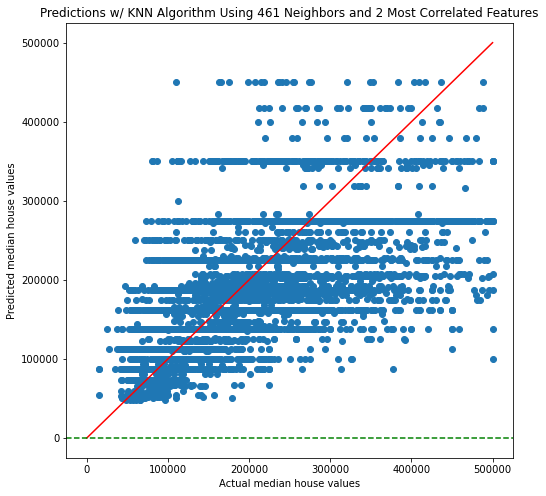

In [ ]:
# Plot predictions for KNN algorithm.

plot_results(y_test, y_pred_knn_discorr, 'Predictions w/ KNN Algorithm Using ' + str(neighbors_num) + ' Neighbors and 2 Most Correlated Features')

In [ ]:
# Take a deeper look at all of the actual vs. predicted values.

comparisons_knn_discorr = y_test.copy()
comparisons_knn_discorr.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
temp_col_names = []
for col in X_test_knn_discorr.columns:
    comparisons_knn_discorr[col] = X_test_knn_discorr[col]
    temp_col_names.append(col)
comparisons_knn_discorr['pred'] = y_pred_knn_discorr
comparisons_knn_discorr['diff'] = comparisons_knn_discorr['actual'] - comparisons_knn_discorr['pred']
temp_col_names.extend(['actual', 'pred', 'diff'])
comparisons_knn_discorr = comparisons_knn_discorr[temp_col_names]
comparisons_knn_discorr

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
0,0.105615,0.070364,104200.0,162500.0,-58300.0
1,0.293411,0.034193,171200.0,162500.0,8700.0
2,0.280539,0.243019,97300.0,100000.0,-2700.0
3,0.240208,0.030625,102700.0,225000.0,-122300.0
4,0.134419,0.189486,116500.0,112500.0,4000.0
...,...,...,...,...,...
5898,0.077326,0.356258,66000.0,87500.0,-21500.0
5899,0.159498,0.018568,330800.0,250000.0,80800.0
5900,0.290572,0.122209,144400.0,162500.0,-18100.0
5901,0.266853,0.058355,200000.0,187500.0,12500.0


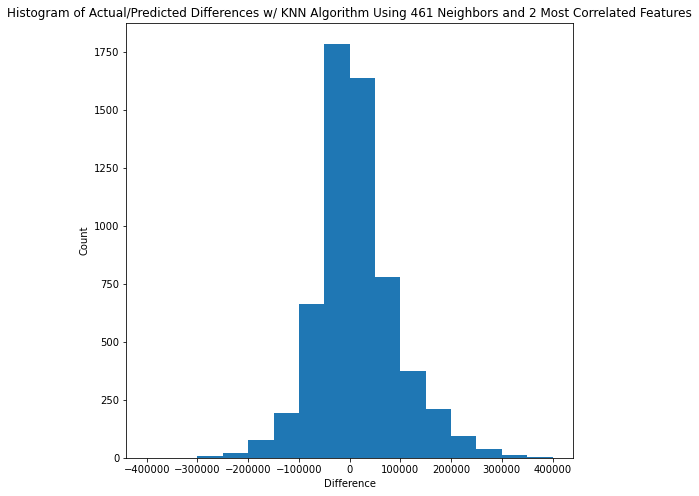

In [ ]:
plt.figure(figsize = (8, 8))
hist_bins = np.arange(-400000, 400001, 50000)
plt.hist(comparisons_knn_discorr['diff'], bins = hist_bins)
plt.title('Histogram of Actual/Predicted Differences w/ KNN Algorithm Using 461 Neighbors and 2 Most Correlated Features')
plt.xlabel('Difference')
plt.ylabel('Count')
plt.show()

In [ ]:
len(comparisons_knn_discorr['pred'].unique())

118

In [ ]:
comparisons_knn_discorr['pred'].value_counts().head(25)

162500.0    805
137500.0    641
275000.0    503
112500.0    474
187500.0    445
225000.0    441
87500.0     312
100000.0    249
350000.0    199
205100.0    144
191700.0    127
250000.0     91
183800.0     79
73000.0      73
207000.0     68
202300.0     61
175000.0     61
174200.0     60
227100.0     57
122200.0     51
181000.0     47
125000.0     43
195800.0     35
146900.0     33
51700.0      32
Name: pred, dtype: int64

In [ ]:
# Calculate the RMSE of this model.

rmse(y_pred_knn_discorr, y_test)

'Average difference between predicted and actual median house values: 79455.51995314995'

__Takeaways of 5th model__:

 - From eyeballing the plot: 
    - The spread of predicted median house values as the actual values increase has technically increased compared to the previous model. The more noticeable change is that the spread of _actual_ median house values as the _predicted_ values increase has also drastically increased. This indicates that the same predicted value is being applied to a wider range of actual values, which suggests decreased accuracy.
    - There are only 118 unique predicted values.
      - The fact that there are a discrete number of predicted values makes sense, since we are applying a classification algorithm to a dataset of continuous numerical features and label.
      - This low number of values seems consistent with a KNN algorithm with such a high number of neighbors as 461 - each test observation is going to be more influenced by any nearby large clusters, whereas a small number of neighbors would cause each observation to be more influenced by the unique nearby values.
    - There are no negative predictions.
    - The model still appears to underpredict more and more as the actual value increases, and with more and more difference, although to what extent is now hard to discern.
    - Visually, like the previous model, predicted values tend to curve downward as actual values increase, although again to what extent is now hard to discern.
 - The RMSE is 79,456, which is about 15,000 higher than that of the previous model, and about tied for worst with models #2 and #3.
 - We also see in the preliminary brute-force crosscheck that the testing accuracy for all potential models is very low. This is likely because we are fitting a discrete classification model to a dataset better analyzed with a continuous linear regression model.

__6th model__: Create a KNN algorithm with 461 neighbors as determined in the 5th model via GridSearchCV, and using the best 10 features as determined in the 4th model via SelectKBest.

In [ ]:
# Declare features to use in both training and test sets.

X_train_knn_selectKbest = X_train[cols_selected]
X_test_knn_selectKbest = X_test[cols_selected]
X_train_knn_selectKbest

,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,0.347800,0.240000,0.067704,0.080087,0.041061,0.085362,0.189160,0.585657,0.100989,0.035275,0.179909,0.544218,0.579302
1,0.178861,0.640000,0.036396,0.045941,0.023011,0.049342,0.545165,0.335657,0.192332,0.463096,0.543656,0.105429,0.141409
2,0.248446,0.500000,0.026858,0.035698,0.024889,0.039638,0.255048,0.388446,0.057921,0.220646,0.326984,0.353548,0.399886
3,0.193472,0.060000,0.059515,0.092038,0.042462,0.089309,0.069075,0.706175,0.033856,0.129510,0.044348,0.745395,0.765560
4,0.116755,0.540000,0.039676,0.100264,0.055243,0.097862,0.164718,0.603586,0.064046,0.005471,0.154460,0.580246,0.612658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,0.094443,0.200000,0.023323,0.030576,0.001850,0.006743,0.812965,0.325697,0.715457,0.714069,0.753279,0.388152,0.323836
13768,0.186143,0.519677,0.020652,0.033214,0.009081,0.029441,0.639745,0.285857,0.162816,0.568415,0.632985,0.167825,0.133087
13769,0.081991,0.760000,0.043975,0.074965,0.059194,0.078289,0.130712,0.605578,0.003762,0.030516,0.130100,0.614388,0.644144
13770,0.242849,0.080000,0.029198,0.047959,0.018078,0.039967,0.526036,0.241036,0.037039,0.497296,0.572441,0.020247,0.059603


In [ ]:
# Build the algorithm.

knn_selectKbest = KNeighborsClassifier(neighbors_num)
knn_selectKbest.fit(X_train_knn_selectKbest, y_train)

c:\Users\Dan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=461)

In [ ]:
# Use the algorithm to predict median house value among the test set.

y_pred_knn_selectKbest = knn_selectKbest.predict(X_test_knn_selectKbest)

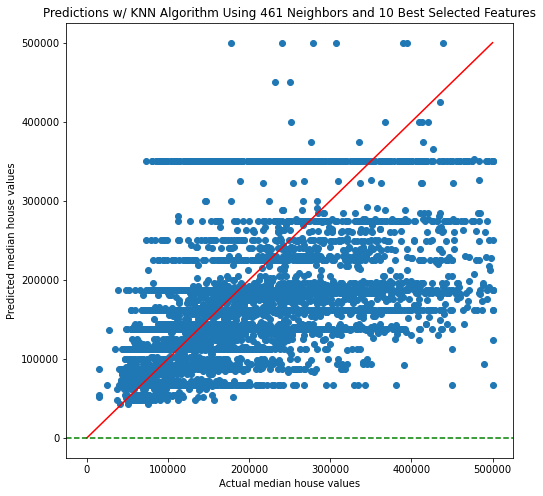

In [ ]:
# Plot predictions for KNN algorithm.

plot_results(y_test, y_pred_knn_selectKbest, 'Predictions w/ KNN Algorithm Using ' + str(neighbors_num) + ' Neighbors and 10 Best Selected Features')

In [ ]:
# Take a deeper look at all of the actual vs. predicted values.

comparisons_knn_selectKbest = y_test.copy()
comparisons_knn_selectKbest.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
temp_col_names = []
for col in X_test_knn_selectKbest.columns:
    comparisons_knn_selectKbest[col] = X_test_knn_selectKbest[col]
    temp_col_names.append(col)
comparisons_knn_selectKbest['pred'] = y_pred_knn_selectKbest
comparisons_knn_selectKbest['diff'] = comparisons_knn_selectKbest['actual'] - comparisons_knn_selectKbest['pred']
temp_col_names.extend(['actual', 'pred', 'diff'])
comparisons_knn_selectKbest = comparisons_knn_selectKbest[temp_col_names]
comparisons_knn_selectKbest

,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj,actual,pred,diff
0,0.105615,0.460000,0.063355,0.107248,0.039715,0.105428,0.027630,0.736056,0.070364,0.179616,0.017150,0.806540,0.822170,104200.0,67500.0,36700.0
1,0.293411,0.260000,0.049443,0.071551,0.033689,0.063816,0.041445,0.718127,0.034193,0.158144,0.019571,0.780346,0.797919,171200.0,137500.0,33700.0
2,0.280539,0.519677,0.042754,0.040975,0.018022,0.041776,0.170032,0.703187,0.243019,0.086393,0.132346,0.652938,0.679496,97300.0,113500.0,-16200.0
3,0.240208,0.400000,0.038430,0.049201,0.026346,0.049178,0.895855,0.033865,0.030625,0.905085,0.919750,0.529610,0.420662,102700.0,81300.0,21400.0
4,0.134419,0.660000,0.059769,0.094366,0.031503,0.097039,0.646121,0.295817,0.189486,0.569744,0.633900,0.178410,0.145079,116500.0,137500.0,-21000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,0.077326,0.860000,0.015031,0.020798,0.010118,0.019572,0.300744,0.531873,0.356258,0.159156,0.284411,0.403818,0.448923,66000.0,50000.0,16000.0
5899,0.159498,0.600000,0.044153,0.065187,0.020825,0.058059,0.470776,0.240040,0.018568,0.457389,0.537213,0.048173,0.109531,330800.0,187500.0,143300.0
5900,0.290572,0.340000,0.122361,0.131460,0.065305,0.138322,0.622742,0.297809,0.122209,0.548161,0.615754,0.151543,0.128793,144400.0,130600.0,13800.0
5901,0.266853,0.900000,0.001272,0.001707,0.001570,0.001809,0.061637,0.721116,0.058355,0.144563,0.037381,0.763410,0.782238,200000.0,137500.0,62500.0


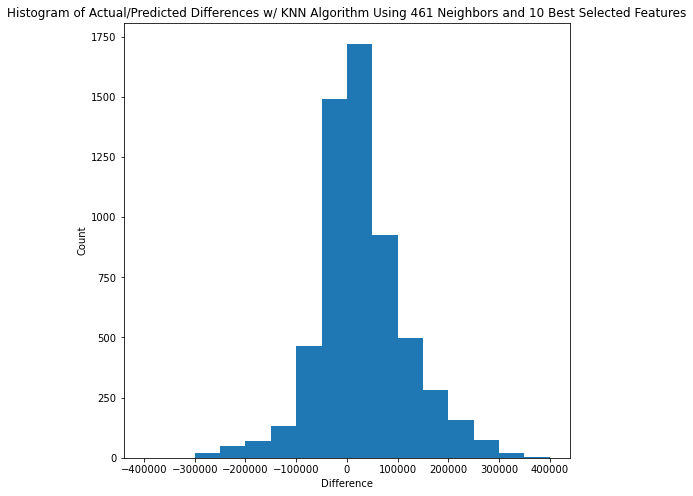

In [ ]:
plt.figure(figsize = (8, 8))
hist_bins = np.arange(-400000, 400001, 50000)
plt.hist(comparisons_knn_selectKbest['diff'], bins = hist_bins)
plt.title('Histogram of Actual/Predicted Differences w/ KNN Algorithm Using 461 Neighbors and 10 Best Selected Features')
plt.xlabel('Difference')
plt.ylabel('Count')
plt.show()

In [ ]:
len(comparisons_knn_selectKbest['pred'].unique())

248

In [ ]:
comparisons_knn_selectKbest['pred'].value_counts().head(25)

137500.0    810
162500.0    711
187500.0    442
112500.0    434
350000.0    378
87500.0     328
67500.0     218
183800.0    205
143800.0    156
225000.0    149
275000.0    138
81300.0      85
161800.0     84
93800.0      76
250000.0     69
175800.0     61
100000.0     54
196200.0     54
123600.0     43
118800.0     39
229600.0     37
181300.0     35
73000.0      33
175000.0     29
47500.0      29
Name: pred, dtype: int64

In [ ]:
# Calculate the RMSE of this model.

rmse(y_pred_knn_selectKbest, y_test)

'Average difference between predicted and actual median house values: 91068.66864445787'

__Takeaways of 6th model__:

 - From eyeballing the plot:
    - There are similar problems here as with the previous model when compared to the linear regression models, except worse: increased spread of predicted median house values as actual values increase; and increased spread of _actual_ values as _predicted_ values increase. In particular there a very noticeable common predicted value of 350,000 that is being applied to houses across the entire range of actual values.
    - There are 248 unique predicted values, 130 more than in the previous model. This increase makes sense - as there are more features to consider and predictions become more complicated, there will be more specific predicted values.
    - There are no negative predictions.
    - The model still appears to underpredict more and more as the actual value increases, and with more and more difference, although to what extent is now hard to discern.
    - Visually, like the previous model, predicted values tend to curve downward as actual values increase, although again to what extent is now hard to discern.
 - The RMSE is 91,069, which is about 12,000 higher than that of the previous model, and is now the worst out of all models. Not sure if the optimal number of selected features differs when using a linear regression model versus a (perhaps out-of-place) classification model, or if it simply becomes less accurate to use such a larger number of features.

__7th model__: Create a decision tree with a depth of X as determined via GridSearchCV, and using all features.

In [100]:
# TESTING - DELETE LATER

dectree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42)
cv_scores = cross_val_score(dectree, X_train, y_train, cv = 5, scoring = 'accuracy')
dectree_results = dectree.fit(X_train, y_train)
dectree_score = dectree_results.score(X_train, y_train)
dectree_score_test = dectree_results.score(X_test, y_test)
print(str(dectree_score))
print(str(dectree_score_test))

c:\Users\Dan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.009003775776938717
0.005929188548195833


In [101]:
# Determine the optimal depth to use in the trees, first by determining the approximate neighborhood of the optimal depth, then by searching around that neighborhood.

depths_neighborhood = np.arange(3, 46, 3)
cv_scores_mean_neighborhood = []
cv_scores_std_neighborhood = []
accuracy_scores_neighborhood = []

for depth in depths_neighborhood:
    dectree = DecisionTreeClassifier(criterion = 'gini', max_depth = depth, random_state = 42)
    cv_scores = cross_val_score(dectree, X_train, y_train, cv = 5, scoring = 'accuracy')
    dectree_results = dectree.fit(X_train, y_train)
    dectree_score = dectree_results.score(X_train, y_train)

    cv_scores_mean_neighborhood.append(cv_scores.mean())
    cv_scores_std_neighborhood.append(cv_scores.std())
    accuracy_scores_neighborhood.append(dectree_score)


c:\Users\Dan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Dan\anaconda3\lib\site-packages

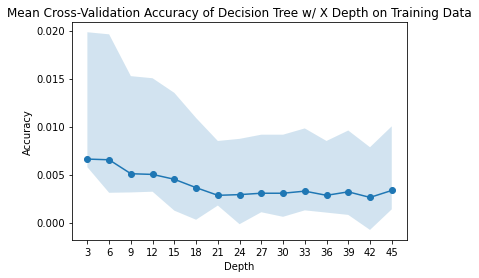

In [102]:
plt.plot(depths_neighborhood, cv_scores_mean_neighborhood, marker = 'o')
plt.fill_between(depths_neighborhood, np.array(cv_scores_mean_neighborhood) - 2 * np.array(cv_scores_std_neighborhood), np.array(cv_scores_mean_neighborhood) + 2 * np.array(cv_scores_mean_neighborhood), alpha = .2)
plt.title('Mean Cross-Validation Accuracy of Decision Tree w/ X Depth on Training Data')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(depths_neighborhood)
plt.show()

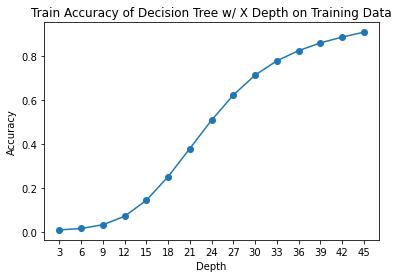

In [138]:
plt.plot(depths_neighborhood, accuracy_scores_neighborhood, marker = 'o')
plt.title('Train Accuracy of Decision Tree w/ X Depth on Training Data')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(depths_neighborhood)
plt.show()

In [104]:
print('Best depth: ' + str(list(depths_neighborhood)[cv_scores_mean_neighborhood.index(max(cv_scores_mean_neighborhood))]) 
+ ' with an accuracy of ' + str(round(max(cv_scores_mean_neighborhood), 4)))

Best depth: 3 with an accuracy of 0.0066


In [139]:
# Build the algorithm.

dectree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [140]:
# Use the algorithm to predict median house value among the test set.

y_pred_dectree = dectree.predict(X_test)

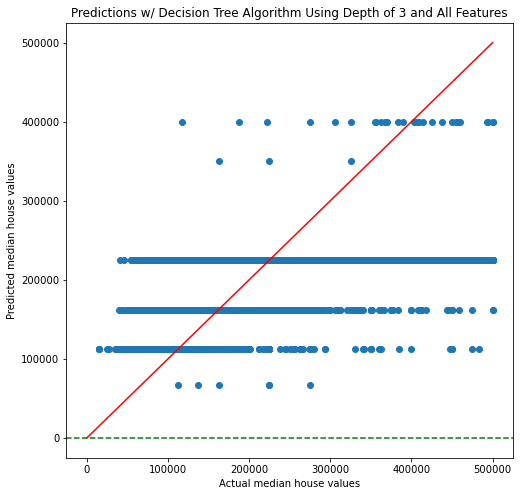

In [141]:
# Plot predictions for decision tree algorithm.

plot_results(y_test, y_pred_dectree, 'Predictions w/ Decision Tree Algorithm Using Depth of 3 and All Features')

In [142]:
# Take a deeper look at all of the actual vs. predicted values.

comparisons_dectree = y_test.copy()
comparisons_dectree.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
temp_col_names = []
for col in X_test.columns:
    comparisons_dectree[col] = X_test[col]
    temp_col_names.append(col)
comparisons_dectree['pred'] = y_pred_dectree
comparisons_dectree['diff'] = comparisons_dectree['actual'] - comparisons_dectree['pred']
temp_col_names.extend(['actual', 'pred', 'diff'])
comparisons_dectree = comparisons_dectree[temp_col_names]
comparisons_dectree

,const,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj,actual,pred,diff
0,1.0,0.105615,0.460000,0.063355,0.107248,0.039715,0.105428,0.027630,0.736056,0.070364,0.179616,0.017150,0.806540,0.822170,104200.0,162500.0,-58300.0
1,1.0,0.293411,0.260000,0.049443,0.071551,0.033689,0.063816,0.041445,0.718127,0.034193,0.158144,0.019571,0.780346,0.797919,171200.0,225000.0,-53800.0
2,1.0,0.280539,0.519677,0.042754,0.040975,0.018022,0.041776,0.170032,0.703187,0.243019,0.086393,0.132346,0.652938,0.679496,97300.0,225000.0,-127700.0
3,1.0,0.240208,0.400000,0.038430,0.049201,0.026346,0.049178,0.895855,0.033865,0.030625,0.905085,0.919750,0.529610,0.420662,102700.0,225000.0,-122300.0
4,1.0,0.134419,0.660000,0.059769,0.094366,0.031503,0.097039,0.646121,0.295817,0.189486,0.569744,0.633900,0.178410,0.145079,116500.0,112500.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,1.0,0.077326,0.860000,0.015031,0.020798,0.010118,0.019572,0.300744,0.531873,0.356258,0.159156,0.284411,0.403818,0.448923,66000.0,112500.0,-46500.0
5899,1.0,0.159498,0.600000,0.044153,0.065187,0.020825,0.058059,0.470776,0.240040,0.018568,0.457389,0.537213,0.048173,0.109531,330800.0,162500.0,168300.0
5900,1.0,0.290572,0.340000,0.122361,0.131460,0.065305,0.138322,0.622742,0.297809,0.122209,0.548161,0.615754,0.151543,0.128793,144400.0,225000.0,-80600.0
5901,1.0,0.266853,0.900000,0.001272,0.001707,0.001570,0.001809,0.061637,0.721116,0.058355,0.144563,0.037381,0.763410,0.782238,200000.0,112500.0,87500.0


In [143]:
len(comparisons_dectree['pred'].unique())

6

In [144]:
comparisons_dectree['pred'].value_counts().head(25)

225000.0    3787
162500.0    1222
112500.0     858
400000.0      27
67500.0        6
350000.0       3
Name: pred, dtype: int64

In [145]:
# Calculate the RMSE of this model.

rmse(y_pred_dectree, y_test)

'Average difference between predicted and actual median house values: 86031.32880920052'

__Takeaways of 7th model__:

 - From eyeballing the plot:
    - There are 6 unique predicted values applied to houses across nearly the entire range of actual prices, which only _technically_ increase with each other (no real evidence of correlation between them). This small number of unique predicted values makes sense with a tree that is only allowed to split 3 times with 2 branches per split.
    - There are no patterns that can be discerned, other than that most predicted values are close to the median value.
 - The RMSE is 86,031, which is surprisingly not the worst out of all models. However, even if this were a good RMSE, it means little when considering how clearly uncorrelated the predicted values are to the actual values.
 - All depths were shown to provide decision tree models with terrible accuracy at predicting new values. This makes sense because, as with the KNN algorithm, this is a model better suited for discrete classification problems than for continuous numerical datasets.
 - Despite technically having the best predictive accuracy, the model with a depth of 3 had the worst score when predicting values within the dataset used to train it. The model with the best score had the maximum depth tested here of 45. A quick (and since removed) analysis showed that this model had thousands of unique predicted values and a RMSE lower by a few thousand. Interestingly, therefore, this model "outperformed" the one that was determined to be most accurate. On the surface, this makes sense because it doesn't seem like a decision tree of depth 3 would be able to make branches with any precise classification with a dataset of this size and number of features. Of course, this model once again is not suited for this dataset, so both sets of results barely matter.

__Things to consider__:

 - Add count and percentage of differences within 25000/50000 of actual price, as well as takeaways, for each model
 - Add AUC-ROC for classification models
 - Consider regularized regression for LR models (Ridge, Lasso)
 - Define formula for taking a deeper look at actual vs. predicted values, using comparisons, X_test, and y_pred

__Notes for next time__:

 - Convert X and y data from dataframes to NumPy arrays before modeling. Not doing this has required many bandaid lines of code down the road.
 - Consider using sklearn's LinearRegression instead of statsmodels' OLS. This may be causing some confusion with compatibility of certain methods and such.
 - The RMSE formula does not need to be defined, as it exists within sklearn already - use the following: <br>
   &ensp; from sklearn.metrics import mean_squared_error <br>
   &ensp; mean_squared_error(y_test, y_pred, squared = False))
 - Consider using RandomizedSearchCV instead of GridSearchCV if the combination of hyperparameters/hyperparameter options/cross-validation folds is too large.